In [12]:
import torch

from models import BestUNet

In [13]:
from data_utils import TimedImageDataset
from torch.utils.data import DataLoader

In [14]:
import matplotlib.pyplot as plt

## Load model into state dict and initialize

In [15]:
dat = torch.load('best_model.ckpt')

model = BestUNet(3, 4)

In [16]:
state_dict = {}
for p, val in dat['state_dict'].items():
    if p[:4] == 'unet':
        state_dict[p[5:]] = val

In [17]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
dataloader = DataLoader(TimedImageDataset('./data/TimeLapseVDataDownsampled/'), batch_size=1)

## Go though data and generate images

In [19]:
from_time = 12
to_times = [0,  6, 12, 18]

In [20]:
i = iter(dataloader)
ind = -1

In [21]:
d = next(i)
ind += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0

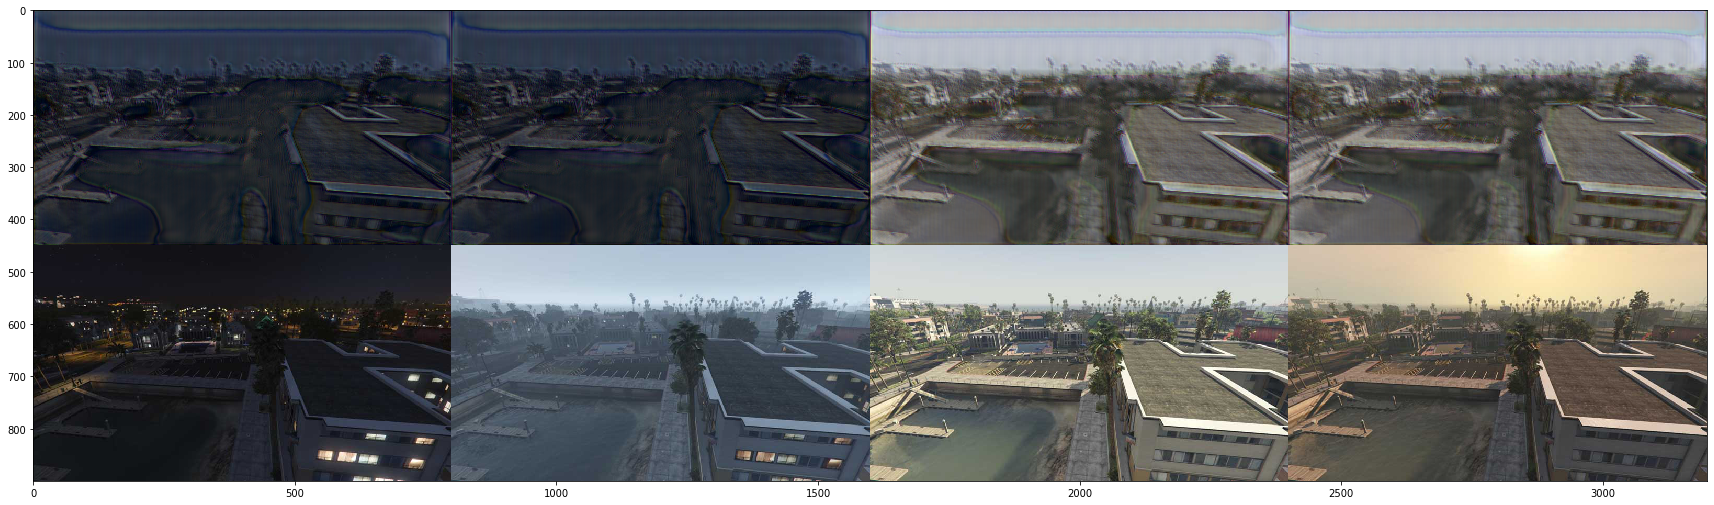

In [22]:
real_imgs = []
for t  in to_times:
    real_imgs.append(d[t].squeeze(0).permute(1, 2, 0))
#plt.imshow(torch.cat(real_imgs, dim=1))

imgs = []
for t  in to_times:
    x = d[from_time]
    t = t * torch.ones(x.shape[0])
    out = model(x, t)
    imgs.append(out.squeeze(0).permute(1, 2, 0).detach())

fig, ax = plt.subplots(figsize=(30, 10))
ax.imshow(torch.cat([torch.cat(imgs, dim=1), torch.cat(real_imgs, dim=1)]))
ind